In [73]:
import pandas as pd
import numpy as np
import pandas_datareader.data as wb

In [74]:
#importando dados

In [75]:
ativo = wb.get_data_yahoo('AUDJPY=X', start=2000)
ativo = ativo.drop(columns='Volume')
ativo = ativo.drop(columns='Adj Close')
ativo['MM5'] = ativo['Close'].rolling(5).mean()
ativo['MM10'] = ativo['Close'].rolling(10).mean()
ativo['MM20'] = ativo['Close'].rolling(20).mean()
ativo['MM30'] = ativo['Close'].rolling(30).mean()
ativo['MM50'] = ativo['Close'].rolling(50).mean()
ativo['MM100'] = ativo['Close'].rolling(100).mean()
ativo['MM200'] = ativo['Close'].rolling(200).mean()
ativo

,High,Low,Open,Close,MM5,MM10,MM20,MM30,MM50,MM100,MM200
Date,,,,,,,,,,,
2003-12-01,79.739998,78.820000,79.338997,79.370003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-02,79.923111,79.272598,79.370003,79.610001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-03,79.812798,79.190002,79.589996,79.730003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-04,79.739998,79.110001,79.730003,79.570000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-05,79.650002,79.095200,79.589996,79.199997,79.496001,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-22,80.440002,79.900002,80.309998,80.322998,80.065201,80.268600,79.808601,79.344067,78.324741,76.915528,75.222374
2021-01-25,80.334000,79.769997,80.066002,80.069000,80.102600,80.244501,79.872301,79.397201,78.400001,76.942111,75.281569
2021-01-26,80.334000,79.612000,80.028999,80.059998,80.176399,80.224800,79.941401,79.453000,78.470941,76.968821,75.340324


In [76]:
mais_recente = ativo.iloc[[-2]]
mais_recente

,High,Low,Open,Close,MM5,MM10,MM20,MM30,MM50,MM100,MM200
Date,,,,,,,,,,,
2021-01-27,80.406998,79.68,80.323997,80.309998,80.213799,80.1892,80.01665,79.5201,78.557021,77.007961,75.402974


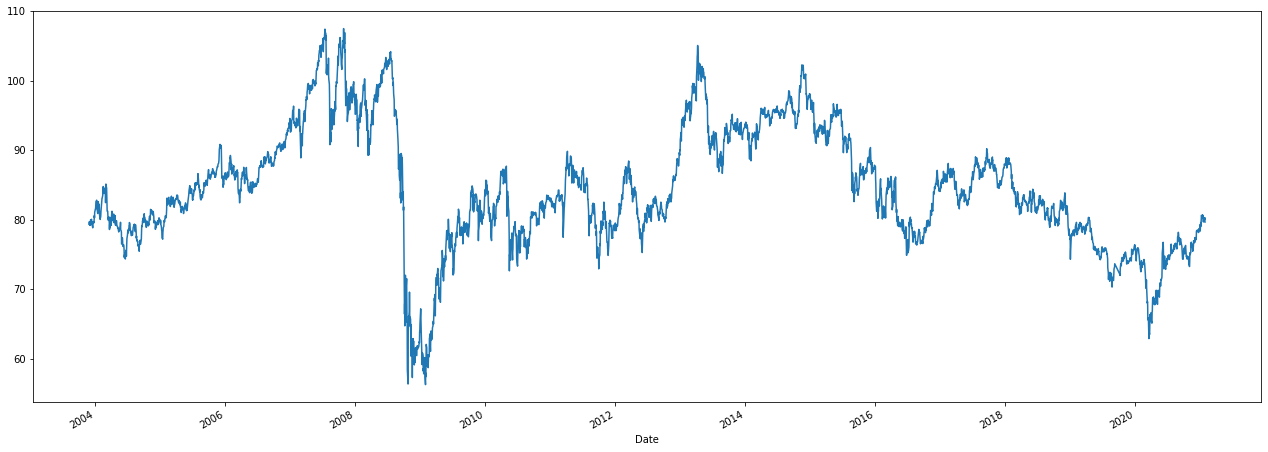

In [77]:
ativo['Close'].plot(figsize=(22,8))

In [78]:
resultado = []
for i in range(0, len(ativo)):
  if ativo['Close'][i] > ativo['Open'][i]:
    resultado.append(1)
  else:
    resultado.append(0)

In [79]:
resultado.pop(0)
resultado.append('Espera')
ativo['Resultado'] = resultado

In [80]:
ativo = ativo.dropna()
ativo['MM5'] = ativo['MM5'] / ativo['Close']
ativo['MM10'] = ativo['MM10'] / ativo['Close']
ativo['MM20'] = ativo['MM20'] / ativo['Close']
ativo['MM30'] = ativo['MM30'] / ativo['Close']
ativo['MM50'] = ativo['MM50'] / ativo['Close']
ativo['MM100'] = ativo['MM100'] / ativo['Close']
ativo['MM200'] = ativo['MM200'] / ativo['Close']
ativo['Close'] = ativo['Close'] / ativo['Open']
ativo['Low'] = ativo['Low'] / ativo['Open']
ativo['High'] = ativo['High'] / ativo['Open']
ativo['Open'] = ativo['Open'] / ativo['Open']
ativo

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,High,Low,Open,Close,MM5,MM10,MM20,MM30,MM50,MM100,MM200,Resultado
Date,,,,,,,,,,,,
2004-09-02,1.003854,0.992239,1.0,1.001141,1.003363,1.008920,1.021969,1.022526,1.022028,1.021853,1.042869,0
2004-09-05,1.000131,0.994373,1.0,0.997893,1.003339,1.007882,1.021567,1.023223,1.023660,1.022730,1.044169,0
2004-09-06,1.001311,0.991991,1.0,0.993171,1.006831,1.012289,1.025850,1.028968,1.030533,1.028794,1.050654,1
2004-09-07,1.006689,0.994683,1.0,1.005027,0.999821,1.004957,1.018493,1.022759,1.025137,1.022891,1.044849,0
2004-09-08,1.000276,0.987578,1.0,0.991124,1.007027,1.012104,1.025446,1.030893,1.034266,1.031658,1.054184,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-22,1.001619,0.994895,1.0,1.000162,0.996790,0.999323,0.993596,0.987813,0.975122,0.957578,0.936499,1
2021-01-25,1.003347,0.996303,1.0,1.000037,1.000420,1.002192,0.997543,0.991610,0.979155,0.960948,0.940209,1
2021-01-26,1.003811,0.994789,1.0,1.000387,1.001454,1.002058,0.998519,0.992418,0.980152,0.961389,0.941048,0


In [81]:
previsores = ativo.iloc[:len(ativo)-1,0:11]
classe = ativo.iloc[:len(ativo)-1,11]
classe = classe.astype('int')

In [82]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#previsores = scaler.fit_transform(previsores)
#previsores

In [83]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.15)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
classificador = Sequential()
classificador.add(Dense(units=6, activation='relu', input_dim=11))
classificador.add(Dense(units=6, activation='relu'))
classificador.add(Dense(units=1, activation='sigmoid'))
classificador.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

classificador.fit(previsores_treinamento, classe_treinamento, batch_size=10, epochs=3000)
previsoes = classificador.predict(previsores_teste)

Epoch 1/3000
362/362 [==============================] - 1s 2ms/step - loss: 0.6970 - accuracy: 0.5043
Epoch 2/3000
362/362 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.5014
Epoch 3/3000
362/362 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.5010
Epoch 4/3000
362/362 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.5044
Epoch 5/3000
362/362 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.4855
Epoch 6/3000
362/362 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5169
Epoch 7/3000
362/362 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.5199
Epoch 8/3000
362/362 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.5162
Epoch 9/3000
362/362 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.5069
Epoch 10/3000
362/362 [==============================] - 1s 2ms/step - loss: 0.694

In [ ]:
previsoes_teste1 = (previsoes >= 0.6)
previsoes_teste0 = (previsoes > 0.4)
previsoes = (previsoes > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao1 = accuracy_score(classe_teste, previsoes_teste1)
matriz1 = confusion_matrix(classe_teste, previsoes_teste1)

precisao0 = accuracy_score(classe_teste, previsoes_teste0)
matriz0 = confusion_matrix(classe_teste, previsoes_teste0)

precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

In [ ]:
print(precisao1)
print(matriz1)
print(precisao0)
print(matriz0)
print(precisao)
print(matriz)

In [ ]:
# Conclusão: entre 54% -> previsoes = (previsoes > 0.5)

In [ ]:
teste1 = classificador.predict(mais_recente)

In [ ]:
teste1